In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib

Does the llm take on average more steps than the human?

In [3]:
# load the data data/llm_paths_all_gpt4omini_no_memory.tsv
llm_paths_all_gpt4omini_no_memory = pd.read_csv('data/llm_paths_all_gpt4omini_no_memory.tsv', sep='\t')

# describe the data
llm_paths_all_gpt4omini_no_memory.describe()

,path_id,steps
count,27501.000000,27501.000000
mean,13749.600015,1.848224
std,7938.583522,2.154813
min,0.000000,0.000000
25%,6875.000000,0.000000
50%,13750.000000,1.000000
75%,20624.000000,3.000000
max,27499.000000,16.000000


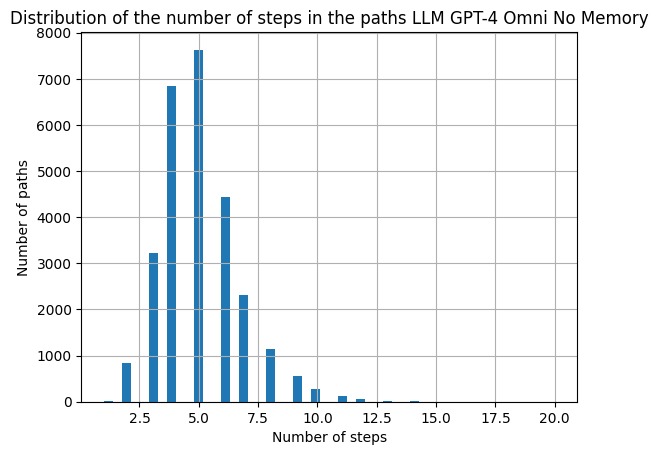

In [4]:
# plot the distribution of the number of steps in the paths
llm_paths_all_gpt4omini_no_memory['path_length'] = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: len(x.split(';')))
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the paths LLM GPT-4 Omni No Memory')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

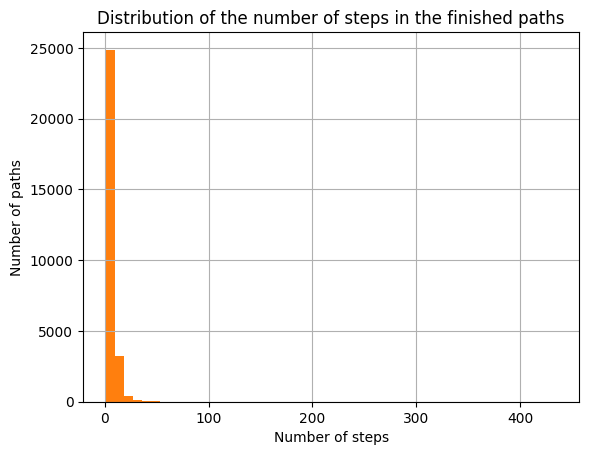

In [5]:
# load the data data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# get the number of steps in the finished paths
paths_finished['path_length'] = paths_finished['path'].apply(lambda x: len(x.split(';')))
paths_finished['path_length'].hist(bins=50)
paths_finished['path_length'].describe()

# plot the distribution of the number of steps in the finished paths
paths_finished['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

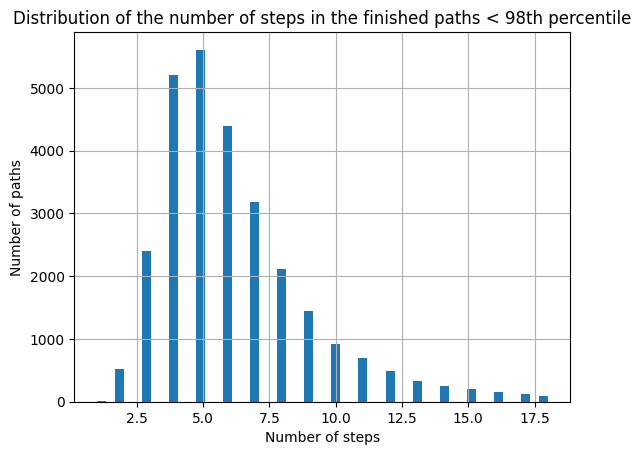

In [6]:
# get the 98th percentile of the number of steps in the finished paths
percentile_98 = np.percentile(paths_finished['path_length'], 98)

# get the number of steps in the finished paths that are less than the 98th percentile
paths_finished_lt_98 = paths_finished[paths_finished['path_length'] < percentile_98]
paths_finished_lt_98['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the finished paths < 98th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

C:\Users\ghita\AppData\Local\Temp\ipykernel_20752\4119247226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')))


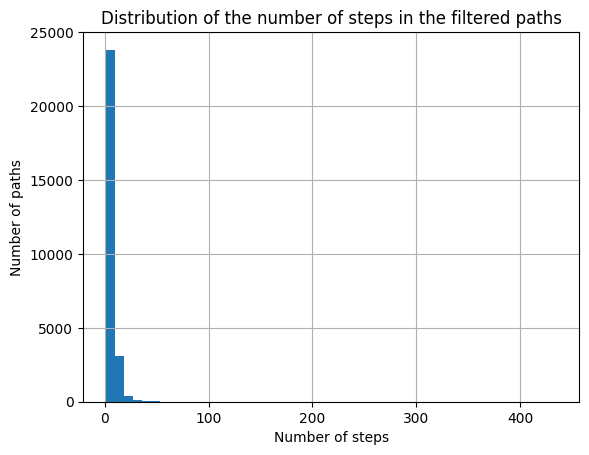

In [7]:
# take only the path_id that are in the 2 datasets
# create a mask using the past_id column
mask = paths_finished['path_id'].isin(llm_paths_all_gpt4omini_no_memory['path_id'])
paths_finished_filtered = paths_finished[mask]


# get the number of steps in the filtered paths
paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')))
paths_finished_filtered['path_length'].describe()

# plot the distribution of the number of steps in the filtered paths
paths_finished_filtered['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the filtered paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()


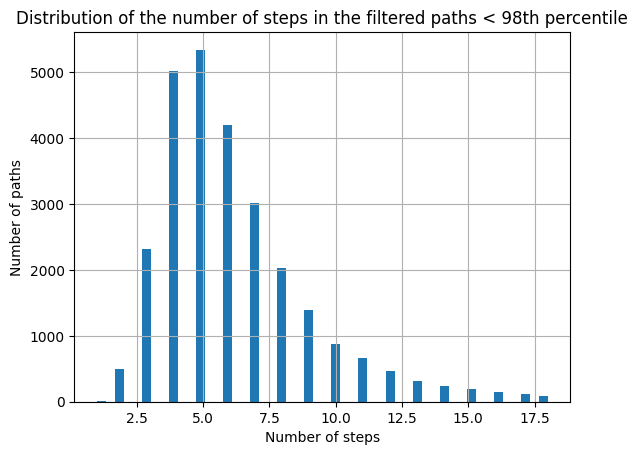

In [8]:
# get the 98th percentile of the number of steps in the filtered paths
percentile_98 = np.percentile(paths_finished_filtered['path_length'], 98)

# plot the distribution of the number of steps in the filtered paths that are less than the 98th percentile
paths_finished_filtered_lt_98 = paths_finished_filtered[paths_finished_filtered['path_length'] < percentile_98]
paths_finished_filtered_lt_98['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the filtered paths < 98th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

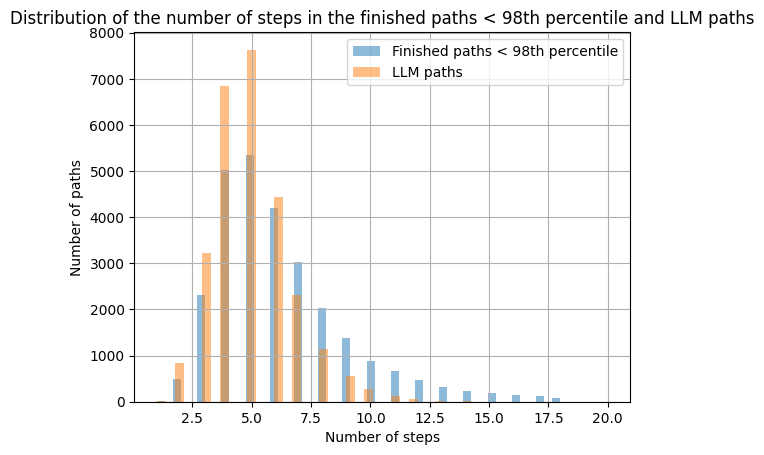

In [9]:
# compare the distribution of the number of steps in the finished paths filtered 98 percentile and the LLM paths
paths_finished_filtered_lt_98['path_length'].hist(bins=50, alpha=0.5, label='Finished paths < 98th percentile')
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50, alpha=0.5, label='LLM paths')
plt.title('Distribution of the number of steps in the finished paths < 98th percentile and LLM paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.show()

How does the llm work for unfinished paths?

In [10]:
DATA_FOLDER = 'data/wikispeedia_paths-and-graph/'
paths_unfinished = pd.read_csv(DATA_FOLDER + 'paths_unfinished.tsv', sep='\t', skiprows=16, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])
paths_unfinished['path'] = paths_unfinished['path'].map(urllib.parse.unquote)

In [11]:
# for each row add a column containing the pair of the first article in the path and the target article
paths_unfinished['pair'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0]) + ' -> ' + paths_unfinished['target']

print(paths_unfinished.head())

    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
4  53a53bc244e08a6a  1297099105           1808   

                                   path            target     type  \
0                        Obi-Wan_Kenobi         Microsoft  timeout   
1                         Julius_Caesar           Caracas  timeout   
2  Malawi;Democracy;Alexander_the_Great     First_Crusade  timeout   
3                              Paraguay  Mount_St._Helens  restart   
4                      Paraguay;Bolivia  Mount_St._Helens  timeout   

                           pair  
0   Obi-Wan_Kenobi -> Microsoft  
1      Julius_Caesar -> Caracas  
2       Malawi -> First_Crusade  
3  Paraguay -> Mount_St._Helens  
4  Paraguay -> Mount_St._Helens  


In [12]:
# create a subset of the data by taking only one ocurrence of each pair
paths_unfinished_unique = paths_unfinished.drop_duplicates(subset='pair')

print(paths_unfinished_unique.head())


    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
5  131600803df4895e  1297100557           2009   

                                                path                target  \
0                                     Obi-Wan_Kenobi             Microsoft   
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
3                                           Paraguay      Mount_St._Helens   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   

      type                                 pair  
0  timeout          Obi-Wan_Kenobi -> Microsoft  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
3  restart         Paraguay ->

In [14]:
# load the data data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# for each row add a column containing the pair of the first article in the path and the target article
paths_finished['pair'] = paths_finished['path'].apply(lambda x: x.split(';')[0] + ' -> ' + x.split(';')[-1])

# get the paths_unfinished_unique that are not in the paths_finished_unique
mask = ~paths_unfinished_unique['pair'].isin(paths_finished['pair'])
paths_unfinished_unique_filtered = paths_unfinished_unique[mask]

print(paths_unfinished_unique_filtered.head())
# get the number of unique paths_unfinished_unique_filtered
print(paths_unfinished_unique_filtered['pair'].nunique())

# store the paths_unfinished_unique_filtered
paths_unfinished_unique_filtered.to_csv('data/paths_unfinished_unique_filtered.tsv', sep='\t', index=False)

    hashedIpAddress   timestamp  durationInSec  \
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
5  131600803df4895e  1297100557           2009   
6  486bb79910fe9dd2  1297101660           1932   
7  6d136e371e42474f  1297102070            175   

                                                path                target  \
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   
6  Mind;Christianity;Europe;Renaissance;Ancient_G...              Scouting   
7    4-2-0;United_States;Agriculture;Sugar;Australia             Cane_Toad   

      type                                 pair  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
5  timeout  Agriculture -> Grand_Canal_of_China  
6  timeout                    